In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd


# Reading the dataset into a DataFrame and checking its general and statistical information
ecommerce_df = pd.read_csv("/content/drive/MyDrive/ML/HW3/5/Ecommerce_Customers")

# Display general information about the DataFrame
print("General Information:")
ecommerce_df.info()

# Display statistical summary of the DataFrame
print("\nStatistical Summary:")
print(ecommerce_df.describe())



General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB

Statistical Summary:
       Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.

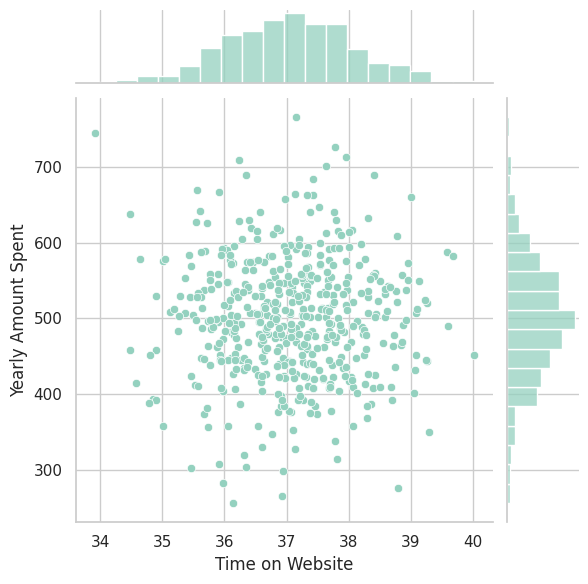

In [3]:
# create a joint plot for the average annual purchase and time spent on the website

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Setting the style and palette
sns.set(style="whitegrid")
sns.set_palette("GnBu_d")

# Creating the joint plot
joint_plot = sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=ecommerce_df, kind='scatter')

# Displaying the plot
plt.show()


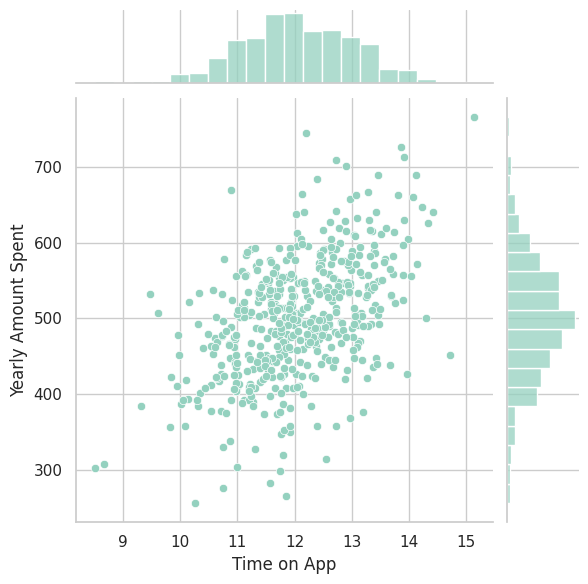

In [4]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent',  data=ecommerce_df)

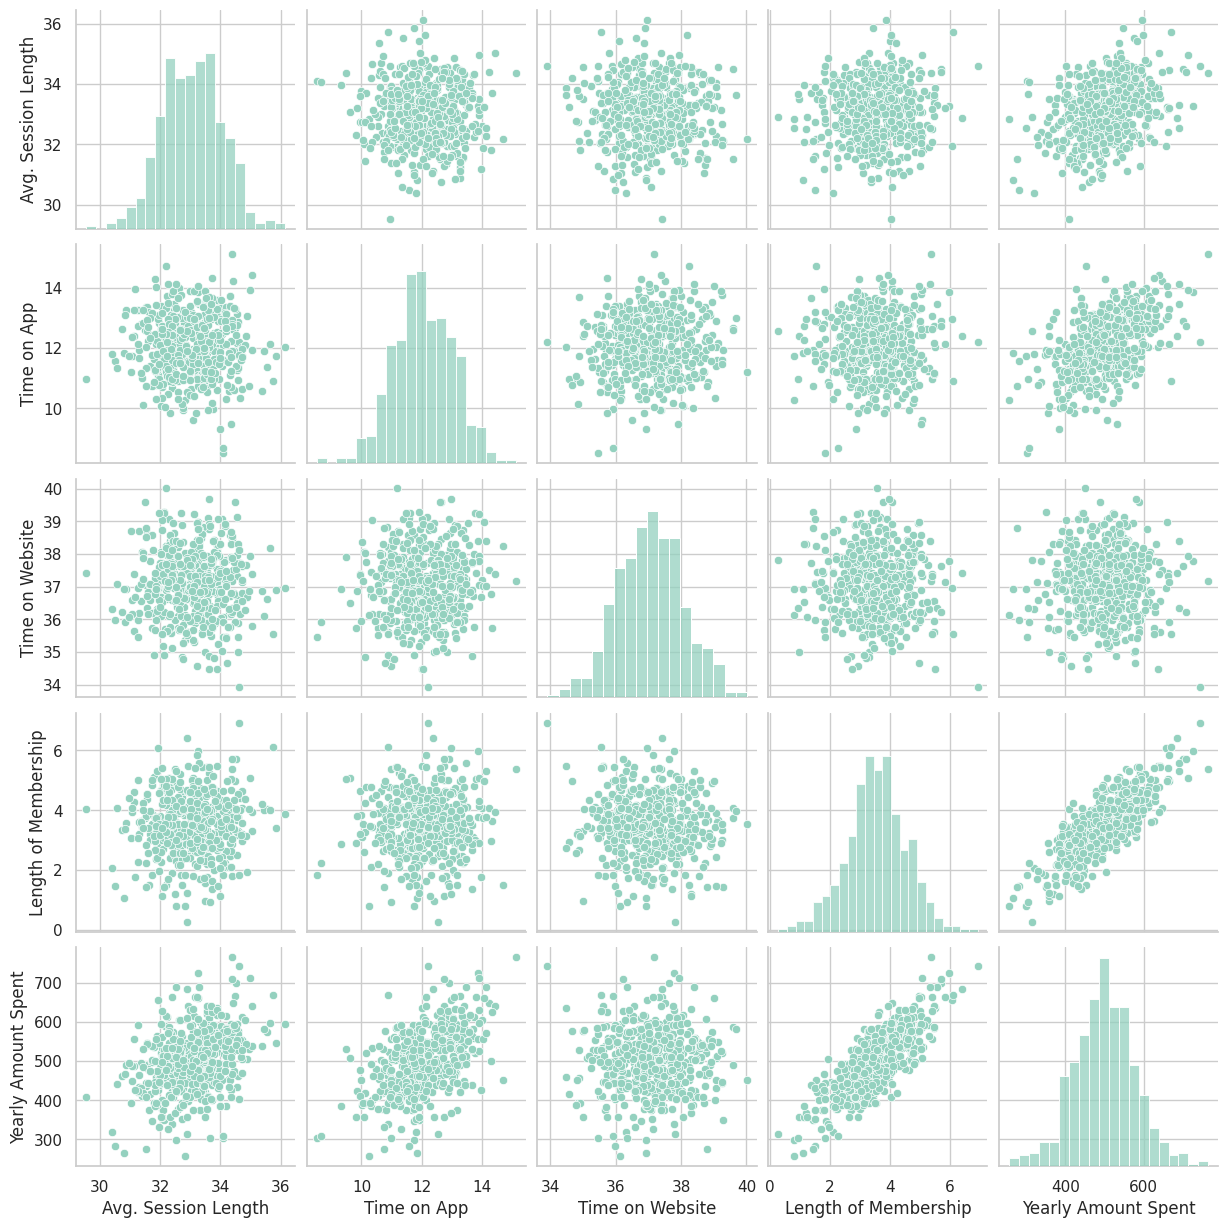

In [5]:


# Creating a pairplot for the dataset
pair_plot = sns.pairplot(ecommerce_df)

# Displaying the pairplot
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'Email', 'Address', 'Avatar' are the categorical features to be dropped
features = ecommerce_df.drop(['Email', 'Address', 'Avatar', 'Yearly Amount Spent'], axis=1)
label = ecommerce_df['Yearly Amount Spent']

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the data into training and testing sets with a 70%-30% split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, label, test_size=0.3, random_state=101)

# Checking the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (350, 4)
Testing Features Shape: (150, 4)
Training Labels Shape: (350,)
Testing Labels Shape: (150,)


In [9]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predicting the final purchase amount for the test data
y_pred = lr_model.predict(X_test)

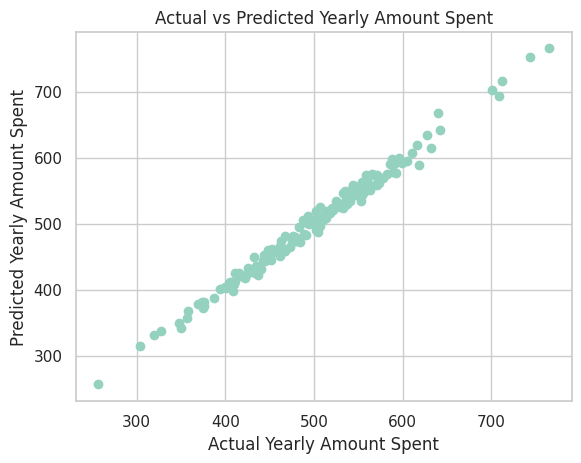

In [10]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs Predicted Yearly Amount Spent')

# Show the plot
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Print the error values
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 79.81305165097451
Root Mean Squared Error: 8.933815066978637
Mean Absolute Error: 7.228148653430832


<ipython-input-12-287d3f6b6069>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


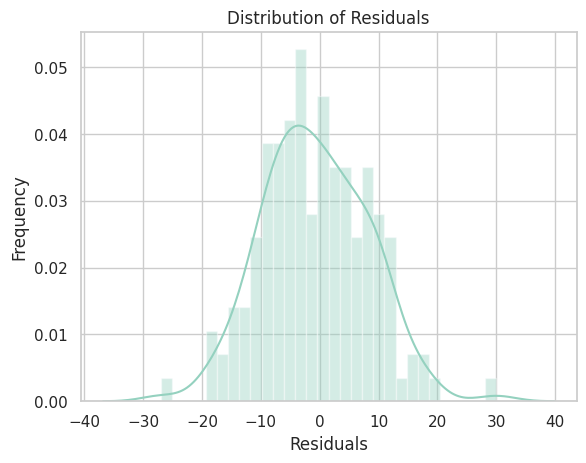

In [12]:

# Calculating residuals
residuals = y_test - y_pred

# Plotting the distribution of residuals
sns.distplot(residuals, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [13]:
# Extracting feature names
feature_names = features.columns

# Extracting coefficients
coefficients = lr_model.coef_

# Creating a DataFrame for coefficients
coefficients_df = pd.DataFrame(coefficients, feature_names, columns=['Coefficient'])

# Displaying the coefficients table
print(coefficients_df)


                      Coefficient
Avg. Session Length     25.762527
Time on App             38.328552
Time on Website          0.192210
Length of Membership    61.173557
